# Liquor, Healthy food index and crime rate data 

In [9]:
import pandas as pd
import numpy as np

# Load datasets 
try:
    liquor_df = pd.read_csv('/Users/bayowaonabajo/Downloads/SW Baltimore Liquor Store Density.csv')
    food_df = pd.read_csv('/Users/bayowaonabajo/Downloads/SW Baltimore Healthy Food Index.csv') 
    crimerate_df = pd.read_csv('/Users/bayowaonabajo/Downloads/SW Balt Crime Rate - Univ of Balt.csv')
    print(" Files loaded successfully!\n")
    
    print("Liquor Store Density Preview:")
    display(liquor_df.head())
    
    print("\nHealthy Food Index Preview:")
    display(food_df.head())
    
    print("\nCrime Rate Preview:")
    display( crimerate_df.head())

except FileNotFoundError as e:
    print(f" Error: {e}")
   

 Files loaded successfully!

Liquor Store Density Preview:


,Name,Area,Liquor Store Density
0,ZCTA5 21207,Dickeyville-Franklintown,0.00
1,ZCTA5 21216,Greater Rosemont,1.05
2,ZCTA5 21216,Forest Park-Walbrook,0.21
3,ZCTA5 21216,Greater Mondawmin,0.23
4,ZCTA5 21223,Poppletown,0.63



Healthy Food Index Preview:


,Name,Area,Healthy Food Availability Index
0,ZCTA5 21207,Dickeyville-Franklintown,2.0
1,ZCTA5 21216,Greater Rosemont,7.5
2,ZCTA5 21216,Forest Park-Walbrook,9.9
3,ZCTA5 21216,Greater Mondawmin,9.7
4,ZCTA5 21223,Poppletown,10.6



Crime Rate Preview:


,Name,Area,Violent Crime Rate
0,ZCTA5 21207,Dickeyville-Franklintown,10.00
1,ZCTA5 21216,Greater Rosemont,22.98
2,ZCTA5 21216,Forest Park-Walbrook,14.53
3,ZCTA5 21216,Greater Mondawmin,22.11
4,ZCTA5 21223,Poppletown,23.26


In [10]:

# Process Liquor Store Density Table
df_liquor = pd.DataFrame(liquor_df)

# Extract ZCTA5 from the "Name" column
df_liquor["ZCTA5"] = df_liquor["Name"].str.extract(r'ZCTA5 (\d+)')
# Aggregate by ZCTA5 (average density if multiple entries exist)
liquor_agg = df_liquor.groupby("ZCTA5")["Liquor Store Density"].mean().reset_index()

# Process Healthy Food Index Table
df_food = pd.DataFrame(food_df)

df_food["ZCTA5"] = df_food["Name"].str.extract(r'ZCTA5 (\d+)')
food_agg = df_food.groupby("ZCTA5")["Healthy Food Availability Index"].mean().reset_index()

# Process Crime Rate Table
df_crime = pd.DataFrame(crimerate_df)

df_crime["ZCTA5"] = df_crime["Name"].str.extract(r'ZCTA5 (\d+)')
crime_agg = df_crime.groupby("ZCTA5")["Violent Crime Rate"].mean().reset_index()

In [11]:
# Merge aggregated tables
merged_extra = liquor_agg.merge(food_agg, on="ZCTA5", how="outer") \
                         .merge(crime_agg, on="ZCTA5", how="outer")

merged_extra.head()

,ZCTA5,Liquor Store Density,Healthy Food Availability Index,Violent Crime Rate
0,21207,0.000000,2.000000,10.000000
1,21216,0.496667,9.033333,19.873333
2,21223,1.786667,9.506667,32.486667
3,21229,0.425000,8.547500,14.980000
4,21230,0.490000,9.585000,21.305000


# Social data which includes education

In [13]:
import pandas as pd

data_SW_social = pd.read_csv("/Users/bayowaonabajo/Downloads/ACS  SW Balt Social/ACS 5 year SW Balt Social.csv") #add dataset
#data_SW_social.head(20)
for idx, value in enumerate(data_SW_social['Label (Grouping)'], 1):
    print(f"{idx}. {value}")

1. HOUSEHOLDS BY TYPE
2.     Total households
3.         Married-couple household
4.             With children of the householder under 18 years
5.         Cohabiting couple household
6.             With children of the householder under 18 years
7.         Male householder, no spouse/partner present
8.             With children of the householder under 18 years
9.             Householder living alone
10.                 65 years and over
11.         Female householder, no spouse/partner present
12.             With children of the householder under 18 years
13.             Householder living alone
14.                 65 years and over
15.         Households with one or more people under 18 years
16.         Households with one or more people 65 years and over
17.         Average household size
18.         Average family size
19. RELATIONSHIP
20.     Population in households
21.         Householder
22.         Spouse
23.         Unmarried partner
24.         Child
25.         Other rel

In [14]:
import pandas as pd
import numpy as np

# Subset the data
subset_df = data_SW_social.iloc[64:76].copy()

# Clean column names
clean_columns = {col: col.replace("ZCTA5 ", "").replace("!!", "_") for col in subset_df.columns}
subset_df.rename(columns=clean_columns, inplace=True)

# Melt to long format
melted_df = subset_df.melt(
    id_vars=["Label (Grouping)"], 
    var_name="ZCTA5_Metric", 
    value_name="Value"
)

# Split ZCTA5 and metric
split_vals = melted_df['ZCTA5_Metric'].str.split("_", n=1, expand=True)
melted_df['ZCTA5'] = split_vals[0]
melted_df['Metric'] = split_vals[1].str.replace("Margin", " Margin").str.strip()

# Clean label names
melted_df['Label (Grouping)'] = melted_df['Label (Grouping)'].str.replace('\xa0', ' ').str.strip()

# Enhanced value cleaning
def clean_value(value):
    try:
        if pd.isna(value) or str(value).strip() in ('(X)', '...'):
            return np.nan
        value_part = str(value).split('±')[0]
        cleaned = value_part.replace(',', '').replace('%', '').strip()
        return float(cleaned) if cleaned else np.nan
    except:
        return np.nan

melted_df['Value'] = melted_df['Value'].apply(clean_value)
melted_df = melted_df.dropna(subset=['Value'])

# Updated education mapping (matches cleaned labels)
education_mapping = {
    'Less than 9th grade': 'Education below high school',
    '9th to 12th grade, no diploma': 'Education below high school',
    'High school graduate (includes equivalency)': 'High school to grad/professional',
    'Some college, no degree': 'High school to grad/professional',
    "Associate's degree": 'High school to grad/professional',
    "Bachelor's degree": 'High school to grad/professional',
    'Graduate or professional degree': 'High school to grad/professional',
    'High school graduate or higher': 'High school to grad/professional',
    "Bachelor's degree or higher": 'High school to grad/professional'
}

# Filter and map
melted_df = melted_df[melted_df['Label (Grouping)'].isin(education_mapping.keys())]
melted_df['Education Category'] = melted_df['Label (Grouping)'].map(education_mapping)

# Pivot table
final_table = melted_df.pivot_table(
    index=['ZCTA5', 'Education Category'],
    columns='Metric',
    values='Value',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Ensure required columns
required_columns = ['Estimate', 'Percent']
for col in required_columns:
    if col not in final_table.columns:
        final_table[col] = 0

# Final formatting
final_table_soc = final_table[['ZCTA5', 'Education Category'] + required_columns]
final_table_soc[['Estimate']] = final_table[['Estimate']].astype(int)
final_table_soc[['Percent']] = final_table[['Percent', ]].round(1)

final_table_soc.head()

Metric,ZCTA5,Education Category,Estimate,Percent
0,21207,Education below high school,3626,10.5
1,21207,High school to grad/professional,72453,209.8
2,21216,Education below high school,2493,13.1
3,21216,High school to grad/professional,36245,190.1
4,21223,Education below high school,3436,24.8


In [15]:
# Convert ZCTA5 to string in both DataFrames to ensure compatibility
merged_extra["ZCTA5"] = merged_extra["ZCTA5"].astype(str)
final_table_soc["ZCTA5"] = final_table_soc["ZCTA5"].astype(str)

# Perform the merge
final_merged = final_table_soc.merge(merged_extra, on="ZCTA5", how="left")

# Optionally, fill NaN values (if desired)
final_merged.fillna(0, inplace=True)
final_merged

,ZCTA5,Education Category,Estimate,Percent,Liquor Store Density,Healthy Food Availability Index,Violent Crime Rate
0,21207,Education below high school,3626,10.5,0.000000,2.000000,10.000000
1,21207,High school to grad/professional,72453,209.8,0.000000,2.000000,10.000000
2,21216,Education below high school,2493,13.1,0.496667,9.033333,19.873333
3,21216,High school to grad/professional,36245,190.1,0.496667,9.033333,19.873333
4,21223,Education below high school,3436,24.8,1.786667,9.506667,32.486667
5,21223,High school to grad/professional,22585,162.9,1.786667,9.506667,32.486667
6,21229,Education below high school,3462,11.2,0.425000,8.547500,14.980000
7,21229,High school to grad/professional,61542,199.8,0.425000,8.547500,14.980000
8,21230,Education below high school,2939,11.8,0.490000,9.585000,21.305000
9,21230,High school to grad/professional,58484,235.1,0.490000,9.585000,21.305000


# Economic data which includes median income and health unisurance estimate

In [17]:
import pandas as pd
data_SW_economic = pd.read_csv("/Users/bayowaonabajo/Downloads/ACS SW Balt Economic Data/ACS 5 year SW Balt Economic.csv") #add dataset
print(data_SW_economic.columns.tolist())


['Label (Grouping)', 'ZCTA5 21207!!Estimate', 'ZCTA5 21207!!Margin of Error', 'ZCTA5 21207!!Percent', 'ZCTA5 21207!!Percent Margin of Error', 'ZCTA5 21216!!Estimate', 'ZCTA5 21216!!Margin of Error', 'ZCTA5 21216!!Percent', 'ZCTA5 21216!!Percent Margin of Error', 'ZCTA5 21223!!Estimate', 'ZCTA5 21223!!Margin of Error', 'ZCTA5 21223!!Percent', 'ZCTA5 21223!!Percent Margin of Error', 'ZCTA5 21229!!Estimate', 'ZCTA5 21229!!Margin of Error', 'ZCTA5 21229!!Percent', 'ZCTA5 21229!!Percent Margin of Error', 'ZCTA5 21230!!Estimate', 'ZCTA5 21230!!Margin of Error', 'ZCTA5 21230!!Percent', 'ZCTA5 21230!!Percent Margin of Error']


In [18]:
for idx, value in enumerate(data_SW_economic['Label (Grouping)'], 1):
    print(f"{idx}. {value}")

1. EMPLOYMENT STATUS
2.     Population 16 years and over
3.         In labor force
4.             Civilian labor force
5.                 Employed
6.                 Unemployed
7.             Armed Forces
8.         Not in labor force
9.     Civilian labor force
10.         Unemployment Rate
11.     Females 16 years and over
12.         In labor force
13.             Civilian labor force
14.                 Employed
15.     Own children of the householder under 6 years
16.         All parents in family in labor force
17.     Own children of the householder 6 to 17 years
18.         All parents in family in labor force
19. COMMUTING TO WORK
20.     Workers 16 years and over
21.         Car, truck, or van -- drove alone
22.         Car, truck, or van -- carpooled
23.         Public transportation (excluding taxicab)
24.         Walked
25.         Other means
26.         Worked from home
27.         Mean travel time to work (minutes)
28. OCCUPATION
29.     Civilian employed population 16 

In [19]:
import pandas as pd

# Assuming `data_SW_economic` is already loaded, we extract the desired subset
subset_df = data_SW_economic.iloc[56:125].copy()

# Cleaning column names to make them more readable
clean_columns = {
    col: col.replace("ZCTA5 ", "").replace("!!", "_") for col in subset_df.columns
}
subset_df.rename(columns=clean_columns, inplace=True)

# Reshaping the data to a long format for easier merging
melted_df = subset_df.melt(id_vars=["Label (Grouping)"], var_name="ZCTA5_Metric", value_name="Value")

# Splitting the `ZCTA5_Metric` column into ZCTA5 and Metric for clarity
melted_df[['ZCTA5', 'Metric']] = melted_df['ZCTA5_Metric'].str.split("_", n=1, expand=True)
melted_df.drop(columns=["ZCTA5_Metric"], inplace=True)

# Pivot the table so that it is structured for merging
final_table_econ = melted_df.pivot_table(index=["Label (Grouping)", "ZCTA5"], columns="Metric", values="Value", aggfunc="first").reset_index()

# Display the first few rows of the transformed datafinal_table_econ)
final_table_econ.head(190)


Metric,Label (Grouping),ZCTA5,Estimate,Margin of Error,Percent,Percent Margin of Error
0,Civilian noninstitutionalized population,21207,"49,164","±2,694","49,164",(X)
1,Civilian noninstitutionalized population,21216,"27,231","±2,284","27,231",(X)
2,Civilian noninstitutionalized population,21223,"19,709","±1,623","19,709",(X)
3,Civilian noninstitutionalized population,21229,"44,133","±2,465","44,133",(X)
4,Civilian noninstitutionalized population,21230,"33,346","±1,757","33,346",(X)
...,...,...,...,...,...,...
185,Mean Social Security income (dollars),21207,"17,748","±1,368",(X),(X)
186,Mean Social Security income (dollars),21216,"16,761","±1,359",(X),(X)
187,Mean Social Security income (dollars),21223,"15,481","±1,257",(X),(X)
188,Mean Social Security income (dollars),21229,"17,392","±1,108",(X),(X)


In [20]:
import pandas as pd
import numpy as np

# Assuming final_table_econ is already defined and contains 'ZCTA5' and 'Estimate'
df = pd.DataFrame(final_table_econ).rename(columns={'Label (Grouping)': 'Metric'})

# Clean and categorize data
def categorize(row):
    metric = row['Metric'].lower().strip()

    if not metric:
        return None

    if any(x in metric for x in ['less than $10,000', '$10,000 to $14,999', '$15,000 to $24,999']):
        return 'below 25,000'
    elif any(x in metric for x in ['$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
                                   '$75,000 to $99,999', '$100,000 to $149,999', '$150,000 to $199,999', '$200,000 or more']):
        return 'above 25,000'
    
    if 'median income' in metric or 'median household income' in metric:
        return 'median_income'
    
    if 'without health insurance' in metric or 'no health insurance' in metric:
        return 'uninsured'
    
    # Removed code for 'no_private_insurance' and 'no_public_insurance'
    
    if 'civilian' in metric:
        return 'total_population'
    
    return None

df['Category'] = df.apply(categorize, axis=1)
df = df.dropna(subset=['Category'])

# Function to clean and sum 'Estimate' values
def clean_and_sum(value):
    if pd.isna(value):
        return 0
    if isinstance(value, str):
        # Remove any non-numeric characters except for periods
        value = value.replace(',', '').strip()
    try:
        return float(value)
    except ValueError:
        return 0

df['Estimate'] = df['Estimate'].apply(clean_and_sum)

# Ensure 'ZCTA5' is treated as a string to prevent unintended numerical operations
df['ZCTA5'] = df['ZCTA5'].astype(str)

# Required categories (removed 'no_private_insurance' and 'no_public_insurance')
required_categories = ['below 25,000', 'above 25,000', 'median_income',
                       'total_population', 'uninsured']

df['Category'] = pd.Categorical(df['Category'], categories=required_categories, ordered=True)

# Pivot table with proper numeric aggregation
pivot_df = df.pivot_table(
    index='ZCTA5',
    columns='Category',
    values='Estimate',
    aggfunc='sum',  # Ensure summation instead of string concatenation
    fill_value=0
).reset_index()

# Rename columns for clarity (removed entries for the excluded categories)
column_mapping = {
    'below 25,000': 'Below25k_Estimate',
    'above 25,000': 'Above25k_Estimate',
    'median_income': 'MedianIncome_Estimate',
    'total_population': 'TotalPop_Estimate',
    'uninsured': 'Uninsured_Estimate'
}

pivot_df = pivot_df.rename(columns=column_mapping)

# Format numbers for better readability
numeric_cols = pivot_df.columns.difference(['ZCTA5'])
pivot_df[numeric_cols] = pivot_df[numeric_cols].applymap(lambda x: f"{int(x):,}" if pd.notnull(x) else x)

# Display final dataframe
pivot_df

/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_1479/1919456459.py:60: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(
/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_1479/1919456459.py:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_df[numeric_cols] = pivot_df[numeric_cols].applymap(lambda x: f"{int(x):,}" if pd.notnull(x) else x)


Category,ZCTA5,Below25k_Estimate,Above25k_Estimate,MedianIncome_Estimate,TotalPop_Estimate,Uninsured_Estimate
0,21207,"3,282","16,326","64,284","89,919","6,724"
1,21216,"4,119","7,548","46,440","49,913","2,250"
2,21223,"2,772","5,528","41,828","36,415","2,707"
3,21229,"3,992","14,525","55,457","80,912","4,497"
4,21230,"2,396","13,607","94,164","63,012","3,692"


In [21]:
pivot_df["ZCTA5"] = pivot_df["ZCTA5"].astype(str)
final_merged["ZCTA5"] = final_merged["ZCTA5"].astype(str)  

In [22]:
merged_SwBalt_df = final_merged.merge(
    pivot_df,
    on="ZCTA5",
    how="left"
)
merged_SwBalt_df

,ZCTA5,Education Category,Estimate,Percent,Liquor Store Density,Healthy Food Availability Index,Violent Crime Rate,Below25k_Estimate,Above25k_Estimate,MedianIncome_Estimate,TotalPop_Estimate,Uninsured_Estimate
0,21207,Education below high school,3626,10.5,0.000000,2.000000,10.000000,"3,282","16,326","64,284","89,919","6,724"
1,21207,High school to grad/professional,72453,209.8,0.000000,2.000000,10.000000,"3,282","16,326","64,284","89,919","6,724"
2,21216,Education below high school,2493,13.1,0.496667,9.033333,19.873333,"4,119","7,548","46,440","49,913","2,250"
3,21216,High school to grad/professional,36245,190.1,0.496667,9.033333,19.873333,"4,119","7,548","46,440","49,913","2,250"
4,21223,Education below high school,3436,24.8,1.786667,9.506667,32.486667,"2,772","5,528","41,828","36,415","2,707"
5,21223,High school to grad/professional,22585,162.9,1.786667,9.506667,32.486667,"2,772","5,528","41,828","36,415","2,707"
6,21229,Education below high school,3462,11.2,0.425000,8.547500,14.980000,"3,992","14,525","55,457","80,912","4,497"
7,21229,High school to grad/professional,61542,199.8,0.425000,8.547500,14.980000,"3,992","14,525","55,457","80,912","4,497"
8,21230,Education below high school,2939,11.8,0.490000,9.585000,21.305000,"2,396","13,607","94,164","63,012","3,692"
9,21230,High school to grad/professional,58484,235.1,0.490000,9.585000,21.305000,"2,396","13,607","94,164","63,012","3,692"


In [23]:
numeric_cols = ["Below25k_Estimate", "Above25k_Estimate", "MedianIncome_Estimate", "TotalPop_Estimate", "Uninsured_Estimate"]
merged_SwBalt_df[numeric_cols] = merged_SwBalt_df[numeric_cols].replace({',': ''}, regex=True).astype(float)
merged_SwBalt_df

,ZCTA5,Education Category,Estimate,Percent,Liquor Store Density,Healthy Food Availability Index,Violent Crime Rate,Below25k_Estimate,Above25k_Estimate,MedianIncome_Estimate,TotalPop_Estimate,Uninsured_Estimate
0,21207,Education below high school,3626,10.5,0.000000,2.000000,10.000000,3282.0,16326.0,64284.0,89919.0,6724.0
1,21207,High school to grad/professional,72453,209.8,0.000000,2.000000,10.000000,3282.0,16326.0,64284.0,89919.0,6724.0
2,21216,Education below high school,2493,13.1,0.496667,9.033333,19.873333,4119.0,7548.0,46440.0,49913.0,2250.0
3,21216,High school to grad/professional,36245,190.1,0.496667,9.033333,19.873333,4119.0,7548.0,46440.0,49913.0,2250.0
4,21223,Education below high school,3436,24.8,1.786667,9.506667,32.486667,2772.0,5528.0,41828.0,36415.0,2707.0
5,21223,High school to grad/professional,22585,162.9,1.786667,9.506667,32.486667,2772.0,5528.0,41828.0,36415.0,2707.0
6,21229,Education below high school,3462,11.2,0.425000,8.547500,14.980000,3992.0,14525.0,55457.0,80912.0,4497.0
7,21229,High school to grad/professional,61542,199.8,0.425000,8.547500,14.980000,3992.0,14525.0,55457.0,80912.0,4497.0
8,21230,Education below high school,2939,11.8,0.490000,9.585000,21.305000,2396.0,13607.0,94164.0,63012.0,3692.0
9,21230,High school to grad/professional,58484,235.1,0.490000,9.585000,21.305000,2396.0,13607.0,94164.0,63012.0,3692.0


In [267]:
merged_SwBalt_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ZCTA5                            10 non-null     object 
 1   Education Category               10 non-null     object 
 2   Estimate                         10 non-null     int64  
 3   Percent                          10 non-null     float64
 4   Liquor Store Density             10 non-null     float64
 5   Healthy Food Availability Index  10 non-null     float64
 6   Violent Crime Rate               10 non-null     float64
 7   Below25k_Estimate                10 non-null     float64
 8   Above25k_Estimate                10 non-null     float64
 9   MedianIncome_Estimate            10 non-null     float64
 10  TotalPop_Estimate                10 non-null     float64
 11  Uninsured_Estimate               10 non-null     float64
dtypes: float64(9), int64(1), 

In [269]:
merged_SwBalt_df.shape

(10, 12)

In [271]:
import pandas as pd

# Sample Data (Only a subset)
data_SW = merged_SwBalt_df.copy()


# Function to classify Healthy Food Score
def classify_healthy_food(x):
    if x > 24:
        return 1
    elif x > 18:
        return 2
    elif x > 12:
        return 3
    elif x > 6:
        return 4
    else:
        return 5

# Function to classify Crime Score
def classify_crime(x):
    if x < 0.5:
        return 1
    elif x < 1:
        return 2
    elif x < 1.5:
        return 3
    elif x < 2:
        return 4
    else:
        return 5

# Function to classify Health Insurance Unavailability Score
def classify_uninsured(x):
    if x < 1000:
        return 1
    elif x < 2000:
        return 2
    elif x < 3000:
        return 3
    elif x < 4000:
        return 4
    else:
        return 5

# Function to classify Education Score (only for "Education below high school")
def classify_education(x):
    if x < 2500:
        return 1
    elif x < 5000:
        return 2
    elif x < 7500:
        return 3
    elif x < 10000:
        return 4
    else:
        return 5

# Function to classify Liquor Store Density (Substance Abuse Risk)
def classify_liquor_density(x):
    if x > 2.0:
        return 5
    elif x > 1.5:
        return 4
    elif x > 1.0:
        return 3
    elif x > 0.5:
        return 2
    else:
        return 1

# Function to classify Median Income Score
def classify_income(x):
    if x > 100000:
        return 1
    elif x > 75000:
        return 2
    elif x > 50000:
        return 3
    elif x > 25000:
        return 4
    else:
        return 5

# Compute Uninsured Percentage (if needed)
data_SW["Uninsured_Percent"] = (data_SW["Uninsured_Estimate"] / data_SW["TotalPop_Estimate"]) * 100

# Filter only rows where "Education Category" is "Education below high school"
education_filtered = data_SW[data_SW["Education Category"] == "Education below high school"].copy()

# Apply classification functions to data_SW
data_SW["Healthy_Food_Score"] = data_SW["Healthy Food Availability Index"].apply(classify_healthy_food)
data_SW["Crime_Score"] = data_SW["Violent Crime Rate"].apply(classify_crime)
data_SW["Uninsured_Score"] = data_SW["Uninsured_Estimate"].apply(classify_uninsured)
data_SW["Liquor_Store_Score"] = data_SW["Liquor Store Density"].apply(classify_liquor_density)
data_SW["Income_Score"] = data_SW["MedianIncome_Estimate"].apply(classify_income)

# Apply education classification to the filtered dataset
education_filtered["Education_Score"] = education_filtered["Estimate"].apply(classify_education)

# Merge education scores back to the original dataset
data_SW_clean = data_SW.merge(
    education_filtered[["ZCTA5", "Education_Score"]],
    on="ZCTA5",
    how="left"
)

# Handle missing Education_Score (e.g., fill with 0 or a default value)
data_SW_clean["Education_Score"] = data_SW_clean["Education_Score"].fillna(0)



# Display results
data_SW_clean[
    ["ZCTA5", "Healthy_Food_Score", "Crime_Score", "Uninsured_Score", 
     "Education_Score", "Liquor_Store_Score", "Income_Score"]
].head(10)

,ZCTA5,Healthy_Food_Score,Crime_Score,Uninsured_Score,Education_Score,Liquor_Store_Score,Income_Score
0,21207,5,5,5,2,1,3
1,21207,5,5,5,2,1,3
2,21216,4,5,3,1,1,4
3,21216,4,5,3,1,1,4
4,21223,4,5,3,2,4,4
5,21223,4,5,3,2,4,4
6,21229,4,5,5,2,1,3
7,21229,4,5,5,2,1,3
8,21230,4,5,4,2,1,2
9,21230,4,5,4,2,1,2


In [ ]:
final_SW_Health_score_index.shape

In [25]:
import pandas as pd

# Create a copy of the cleaned data
data_weighted_health_score = pd.DataFrame(data_SW_clean)

# Compute Composite Score using Equal Weights (Simple Average)
data_weighted_health_score["Composite_Score_Avg"] = data_weighted_health_score[
    ["Healthy_Food_Score", "Crime_Score", "Uninsured_Score",
     "Education_Score", "Liquor_Store_Score", "Income_Score"]
].mean(axis=1)

# Using Equal Weights for the Weighted Score
EQUAL_WEIGHT = 1 / 6  # Since there are 6 features
data_weighted_health_score["Composite_Score_Weighted"] = (
    data_weighted_health_score["Healthy_Food_Score"] * EQUAL_WEIGHT +
    data_weighted_health_score["Crime_Score"] * EQUAL_WEIGHT +
    data_weighted_health_score["Uninsured_Score"] * EQUAL_WEIGHT +
    data_weighted_health_score["Education_Score"] * EQUAL_WEIGHT +
    data_weighted_health_score["Liquor_Store_Score"] * EQUAL_WEIGHT +
    data_weighted_health_score["Income_Score"] * EQUAL_WEIGHT
)

# Display Results
data_weighted_health_score[["ZCTA5", "Composite_Score_Avg", "Composite_Score_Weighted"]].head()


,ZCTA5,Composite_Score_Avg,Composite_Score_Weighted
0,21207,3.500000,3.500000
1,21207,3.500000,3.500000
2,21216,3.000000,3.000000
3,21216,3.000000,3.000000
4,21223,3.666667,3.666667


In [26]:
data_SW_clean["ZCTA5"] = data_SW_clean["ZCTA5"].astype(str)
data_weighted_health_score["ZCTA5"] = data_weighted_health_score["ZCTA5"].astype(str)

final_merged_SW = data_SW_clean.merge(
    data_weighted_health_score[["ZCTA5", "Composite_Score_Avg", "Composite_Score_Weighted"]],
    on="ZCTA5",
    how="left"
)
final_SW_Health_score_index = final_merged_SW[
    ["ZCTA5", "Healthy_Food_Score", "Crime_Score", "Uninsured_Score", 
     "Education_Score", "Liquor_Store_Score", "Income_Score",
     "Composite_Score_Avg", "Composite_Score_Weighted"]
]



final_SW_Health_score_index

,ZCTA5,Healthy_Food_Score,Crime_Score,Uninsured_Score,Education_Score,Liquor_Store_Score,Income_Score,Composite_Score_Avg,Composite_Score_Weighted
0,21207,5,5,5,2,1,3,3.500000,3.500000
1,21207,5,5,5,2,1,3,3.500000,3.500000
2,21207,5,5,5,2,1,3,3.500000,3.500000
3,21207,5,5,5,2,1,3,3.500000,3.500000
4,21216,4,5,3,1,1,4,3.000000,3.000000
5,21216,4,5,3,1,1,4,3.000000,3.000000
6,21216,4,5,3,1,1,4,3.000000,3.000000
7,21216,4,5,3,1,1,4,3.000000,3.000000
8,21223,4,5,3,2,4,4,3.666667,3.666667
9,21223,4,5,3,2,4,4,3.666667,3.666667


In [275]:
final_SW_Health_score_index.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ZCTA5                     20 non-null     object 
 1   Healthy_Food_Score        20 non-null     int64  
 2   Crime_Score               20 non-null     int64  
 3   Uninsured_Score           20 non-null     int64  
 4   Education_Score           20 non-null     int64  
 5   Liquor_Store_Score        20 non-null     int64  
 6   Income_Score              20 non-null     int64  
 7   Composite_Score_Avg       20 non-null     float64
 8   Composite_Score_Weighted  20 non-null     float64
 9   Risk_Label                20 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.7+ KB


In [273]:
final_SW_Health_score_index.shape

(20, 10)

data_SW_clean["ZCTA5"] = data_SW_clean["ZCTA5"].astype(str)
data_weighted_health_score["ZCTA5"] = data_weighted_health_score["ZCTA5"].astype(str)

final_merged_SW = data_SW_clean.merge(
    data_weighted_health_score[["ZCTA5", "Composite_Score_Avg", "Composite_Score_Weighted"]],
    on="ZCTA5",
    how="left"
)

final_SW_Health_score_index = final_merged_SW[
    ["ZCTA5", "Healthy_Food_Score", "Crime_Score", "Uninsured_Score", 
     "Education_Score", "Liquor_Store_Score", "Income_Score",
     "Composite_Score_Avg", "Composite_Score_Weighted"]
].drop_duplicates(subset=["ZCTA5"])


final_SW_Health_score_index

final_SW_Health_score_index

Issues:

Class imbalance: You have 3 "0"s and 2 "1"s. Models can’t learn from this.
No generalization: The model will fail on new data.

Recommendations: Collect more data for modeling.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# final_SW_Health_score_index is DataFrame

# Add Risk_Label
final_SW_Health_score_index["Risk_Label"] = final_SW_Health_score_index["Composite_Score_Weighted"].apply(
    lambda x: 0 if x <= 3.4 else 1
)

# Features and target
X = final_SW_Health_score_index[["Healthy_Food_Score", "Crime_Score", "Uninsured_Score",
                                    "Education_Score", "Liquor_Store_Score", "Income_Score"]]
y = final_SW_Health_score_index["Risk_Label"]

#check the unique values and counts in the target variable BEFORE splitting
print("Unique values in 'Risk_Label' before split:")
print(y.unique())
print("\Value counts in 'Risk_Label' before split:")
print(y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the unique values and counts in the training target variable AFTER splitting
print("\nUnique values in y_train:")
print(pd.Series(y_train).unique())
print("\nValue counts in y_train:")
print(pd.Series(y_train).value_counts())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Unique values in 'Risk_Label' before split:
[1 0]
\Value counts in 'Risk_Label' before split:
Risk_Label
0    12
1     8
Name: count, dtype: int64

Unique values in y_train:
[1 0]

Value counts in y_train:
Risk_Label
0    9
1    5
Name: count, dtype: int64


<>:22: SyntaxWarning: invalid escape sequence '\V'
<>:22: SyntaxWarning: invalid escape sequence '\V'
/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_1479/771996681.py:22: SyntaxWarning: invalid escape sequence '\V'
  print("\Value counts in 'Risk_Label' before split:")
/var/folders/z0/vng18cmj41x80kcsp_9tylwr0000gn/T/ipykernel_1479/771996681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_SW_Health_score_index["Risk_Label"] = final_SW_Health_score_index["Composite_Score_Weighted"].apply(


In [32]:
final_SW_Health_score_index_with_risk = pd.DataFrame(final_SW_Health_score_index)
final_SW_Health_score_index_with_risk["Risk_Label"] = final_SW_Health_score_index_with_risk["Composite_Score_Weighted"].apply(
    lambda x: 0 if x <= 3.4 else 1
)

# Verify results
final_SW_Health_score_index_with_risk.head()

,ZCTA5,Healthy_Food_Score,Crime_Score,Uninsured_Score,Education_Score,Liquor_Store_Score,Income_Score,Composite_Score_Avg,Composite_Score_Weighted,Risk_Label
0,21207,5,5,5,2,1,3,3.5,3.5,1
1,21207,5,5,5,2,1,3,3.5,3.5,1
2,21207,5,5,5,2,1,3,3.5,3.5,1
3,21207,5,5,5,2,1,3,3.5,3.5,1
4,21216,4,5,3,1,1,4,3.0,3.0,0


In [33]:
log_model = LogisticRegression()

In [34]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [35]:
log_model.coef_

array([[ 1.16581266,  0.        , -0.16941651,  0.61674653,  1.08044782,
         0.54505922]])

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [37]:
y_pred = log_model.predict(X_test_scaled)

In [38]:
accuracy_score(y_test,y_pred)

1.0

In [39]:
confusion_matrix(y_test,y_pred)

array([[3, 0],
       [0, 3]])

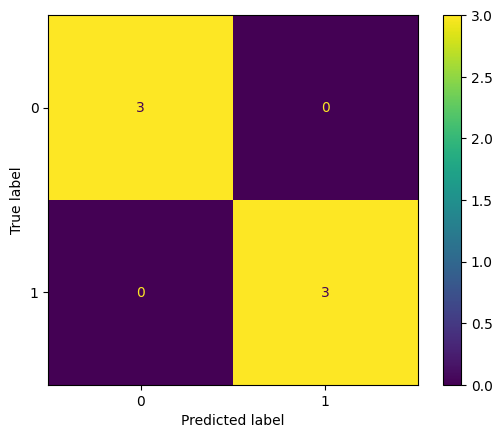

In [40]:
ConfusionMatrixDisplay.from_estimator(log_model,X_test_scaled,y_test)

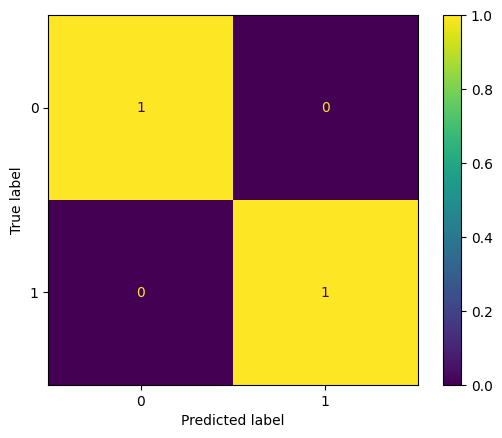

In [41]:
# Scaled so highest value=1
ConfusionMatrixDisplay.from_estimator(log_model,X_test_scaled,y_test,normalize='true')

In [42]:
X_train.iloc[1]

Healthy_Food_Score    5
Crime_Score           5
Uninsured_Score       5
Education_Score       2
Liquor_Store_Score    1
Income_Score          3
Name: 3, dtype: int64

In [43]:
y_train.iloc[1]

1

In [44]:
log_model.predict_proba(X_train.iloc[1].values.reshape(1, -1))

array([[3.23597552e-04, 9.99676402e-01]])

In [45]:
log_model.predict(X_train.iloc[1].values.reshape(1, -1))

array([1])

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [47]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay, RocCurveDisplay

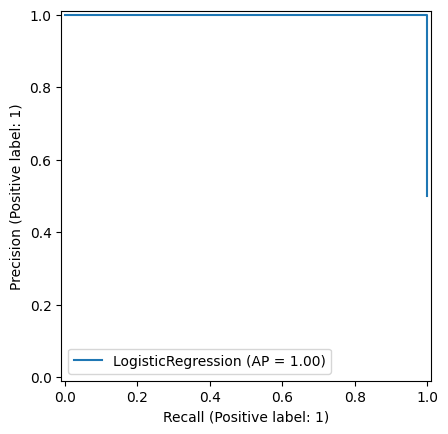

In [48]:
PrecisionRecallDisplay.from_estimator(log_model,X_test_scaled,y_test)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.DataFrame(final_SW_Health_score_index_with_risk)

<Axes: xlabel='ZCTA5', ylabel='Composite_Score_Weighted'>

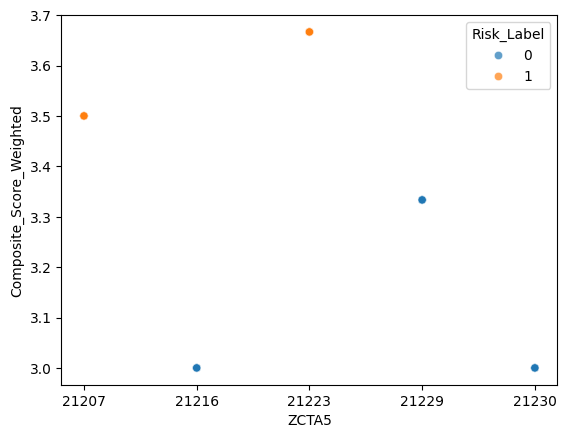

In [52]:
sns.scatterplot(x='ZCTA5',y='Composite_Score_Weighted',hue='Risk_Label',data=df,alpha=0.7)

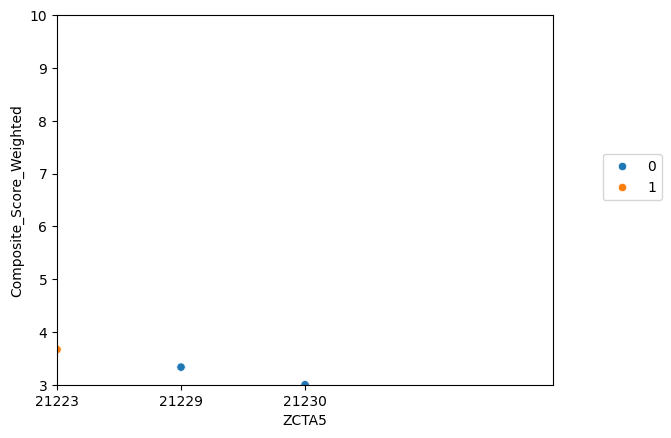

In [53]:
sns.scatterplot(x='ZCTA5',y='Composite_Score_Weighted',hue='Risk_Label',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
X = df.drop('Risk_Label',axis=1)
y = df['Risk_Label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
scaler = StandardScaler()

In [58]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [61]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
full_test = pd.concat([X_test,y_test],axis=1)

In [63]:
len(full_test)

6

<Axes: xlabel='ZCTA5', ylabel='Composite_Score_Weighted'>

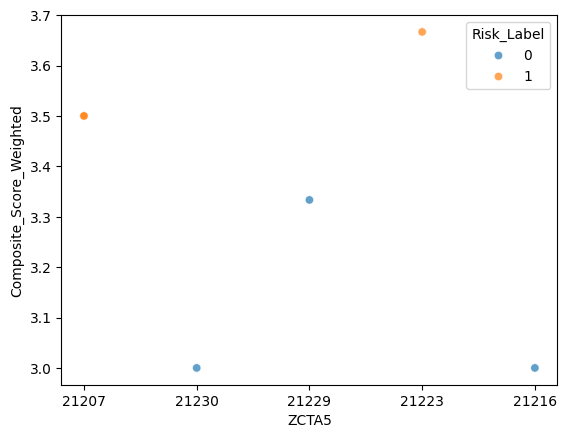

In [64]:
sns.scatterplot(x='ZCTA5',y='Composite_Score_Weighted',hue='Risk_Label',
                data=full_test,alpha=0.7)

In [65]:
y_pred = knn_model.predict(scaled_X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [67]:
accuracy_score(y_test,y_pred)

1.0

In [68]:
confusion_matrix(y_test,y_pred)

array([[3, 0],
       [0, 3]])

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [70]:
test_error_rates = []


for k in range(1,6):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

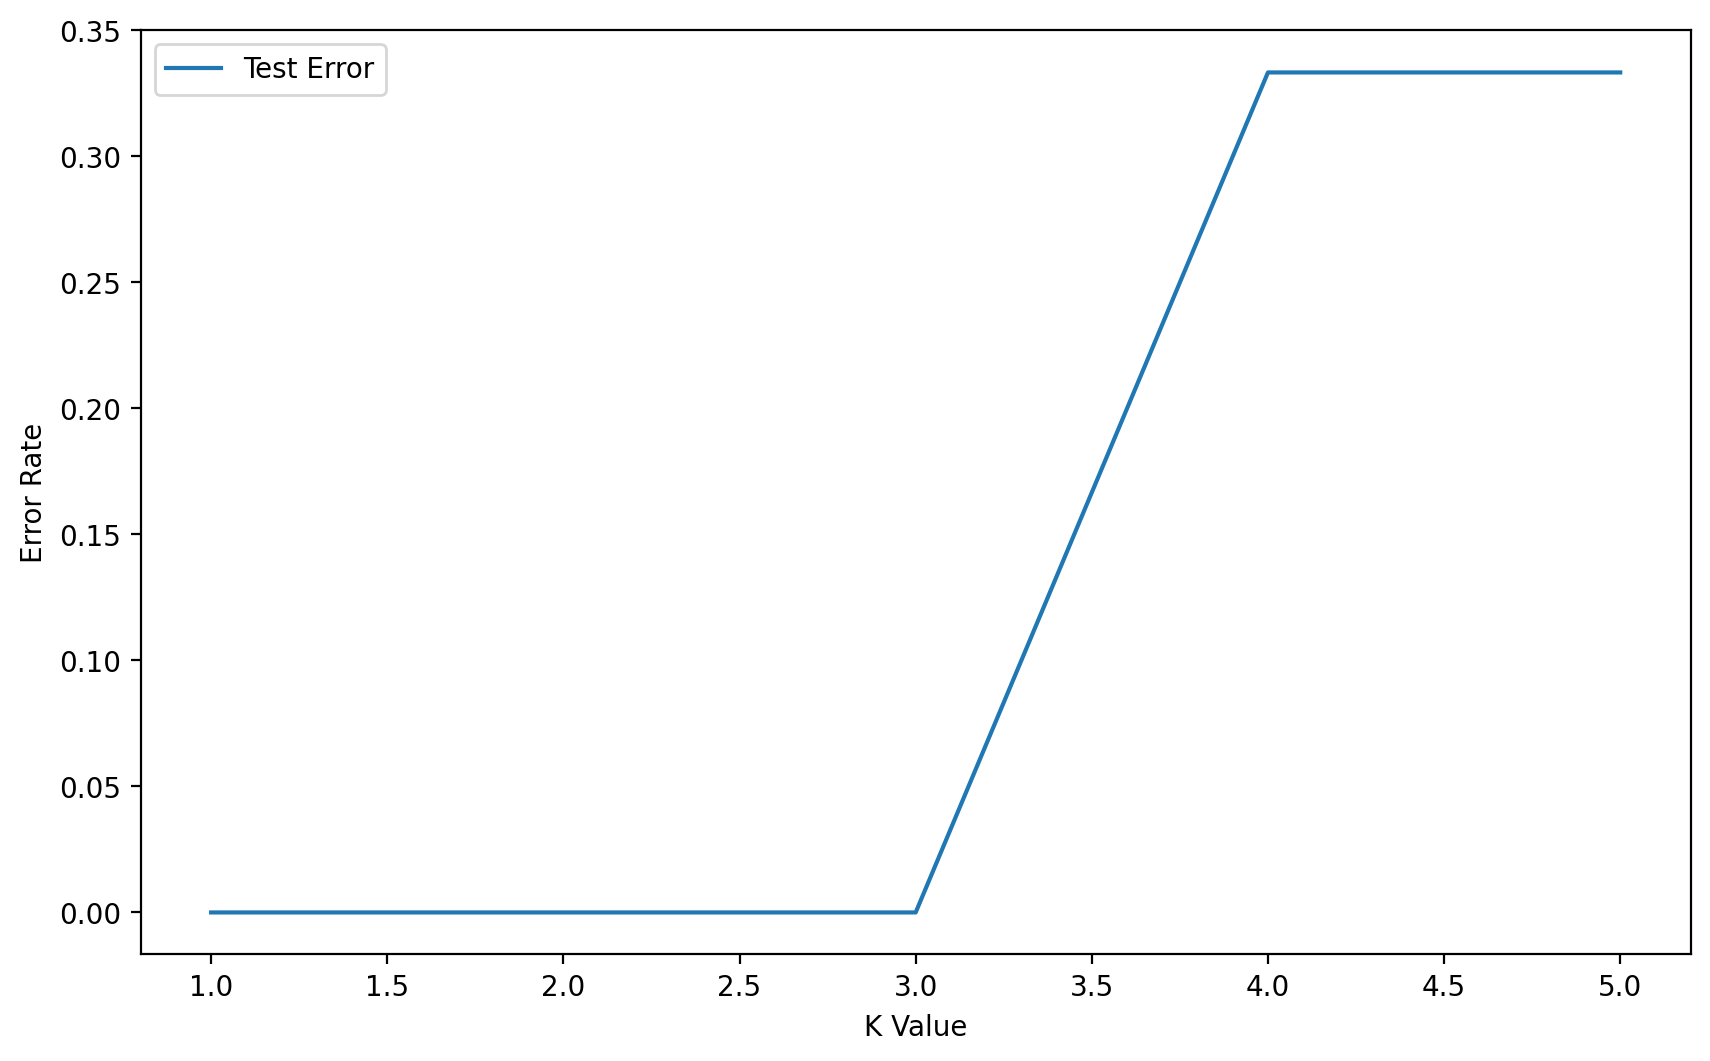

In [71]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,6),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [72]:
scaler = StandardScaler()

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [75]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler),('knn',knn)]

In [76]:
from sklearn.pipeline import Pipeline

In [77]:
pipe = Pipeline(operations)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
k_values = list(range(1,6))

In [80]:
k_values

[1, 2, 3, 4, 5]

In [81]:
param_grid = {'knn__n_neighbors': k_values}

In [82]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [83]:
# Use full X and y if you DON'T want a hold-out test set
# Use X_train and y_train if you DO want a holdout test set (X_test,y_test)
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [84]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [85]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [86]:
len(k_values)

5

In [87]:
full_cv_classifier.cv_results_['mean_test_score']

array([1.        , 0.86666667, 0.86666667, 0.63333333, 0.83333333])

In [88]:
len(full_cv_classifier.cv_results_['mean_test_score'])

5

In [89]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler',scaler),('knn14',knn14)]

In [90]:
pipe = Pipeline(operations)

In [91]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [92]:
pipe_pred = pipe.predict(X_test)

In [93]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
single_sample = X_test.iloc[4]

In [95]:
single_sample

ZCTA5                          21223
Healthy_Food_Score                 4
Crime_Score                        5
Uninsured_Score                    3
Education_Score                    2
Liquor_Store_Score                 4
Income_Score                       4
Composite_Score_Avg         3.666667
Composite_Score_Weighted    3.666667
Name: 8, dtype: object

In [96]:
pipe.predict(single_sample.values.reshape(1, -1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [97]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.64285714, 0.35714286]])

# SVM

In [99]:
import pandas as pd
df.head()

,ZCTA5,Healthy_Food_Score,Crime_Score,Uninsured_Score,Education_Score,Liquor_Store_Score,Income_Score,Composite_Score_Avg,Composite_Score_Weighted,Risk_Label
0,21207,5,5,5,2,1,3,3.5,3.5,1
1,21207,5,5,5,2,1,3,3.5,3.5,1
2,21207,5,5,5,2,1,3,3.5,3.5,1
3,21207,5,5,5,2,1,3,3.5,3.5,1
4,21216,4,5,3,1,1,4,3.0,3.0,0


<Axes: xlabel='ZCTA5', ylabel='Composite_Score_Weighted'>

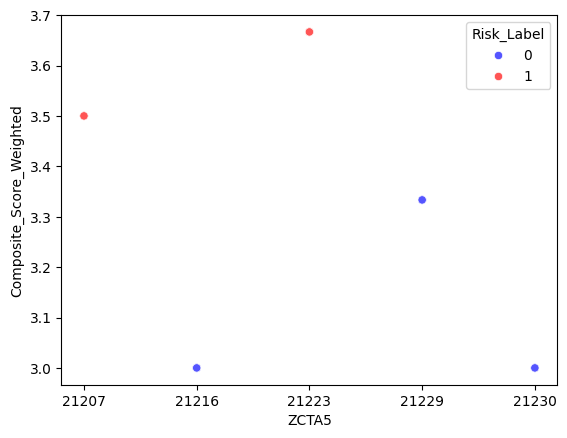

In [194]:
sns.scatterplot(x='ZCTA5',y='Composite_Score_Weighted',hue='Risk_Label',
                data=df,palette='seismic')

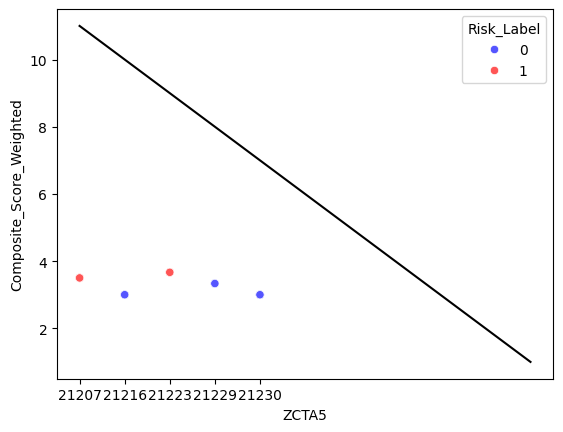

In [197]:
sns.scatterplot(x='ZCTA5',y='Composite_Score_Weighted',hue='Risk_Label',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [200]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [203]:
y = df['Risk_Label']
X = df.drop('Risk_Label',axis=1) 

In [206]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [233]:
import sys
sys.path.append('/Users/bayowaonabajo/Downloads')

# Now try importing
from svm_margin_plot import plot_svm_boundary

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

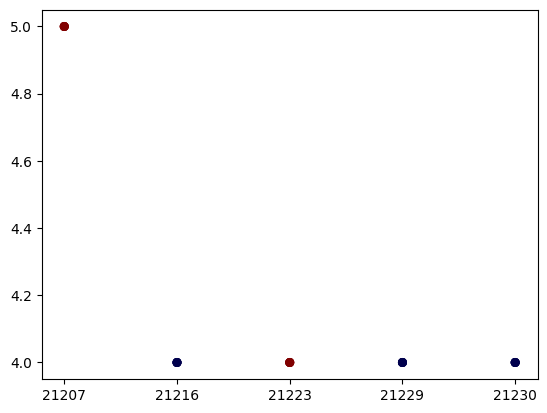

In [234]:
plot_svm_boundary(model,X,y)

In [237]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

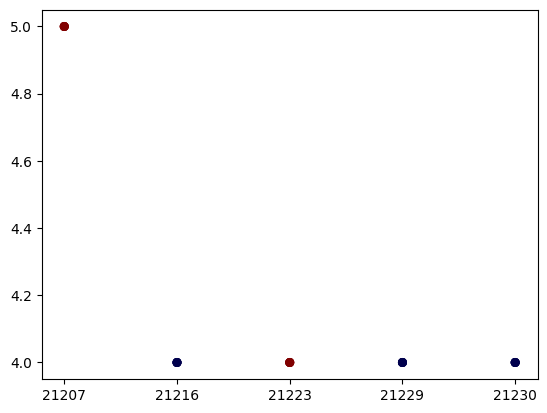

In [239]:
plot_svm_boundary(model,X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

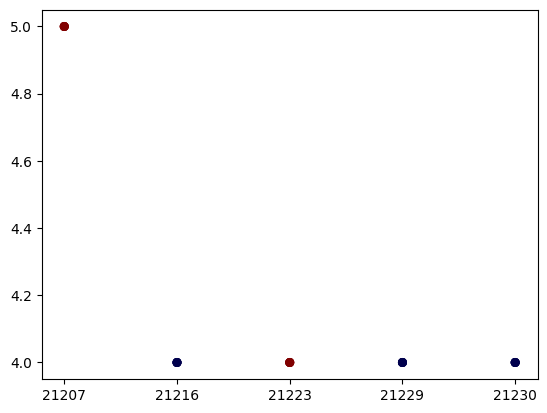

In [241]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

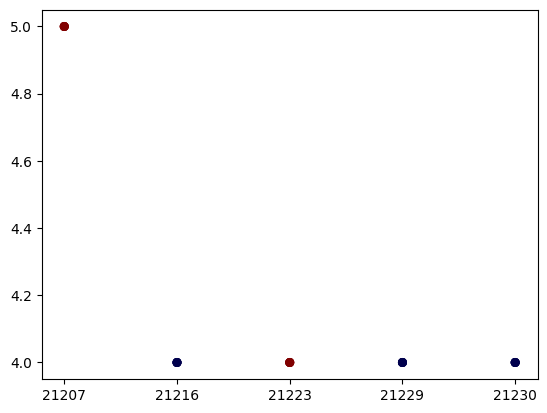

In [243]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

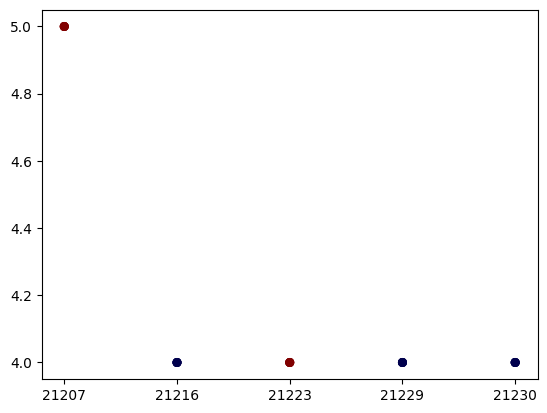

In [245]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

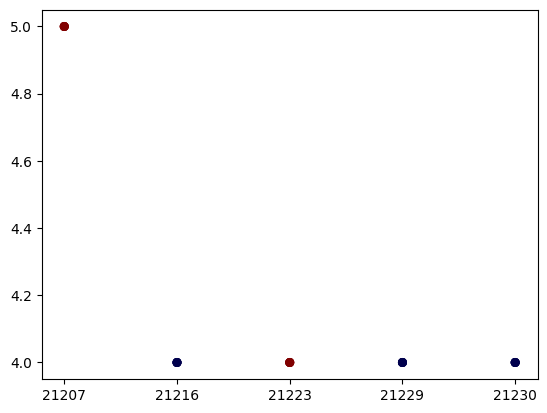

In [247]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 9 features as input.

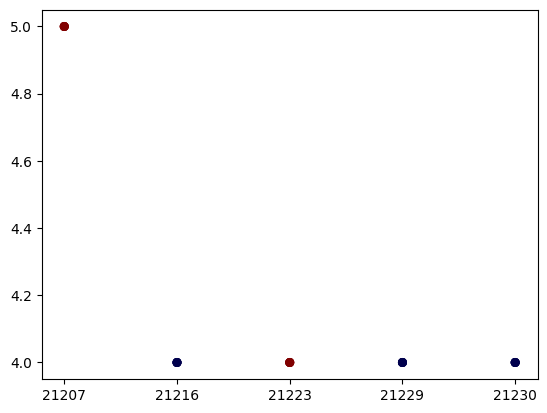

In [250]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [252]:
from sklearn.model_selection import GridSearchCV

In [254]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [256]:
# Note again we didn't split Train|Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [258]:
# 100% accuracy (as expected)
grid.best_score_

0.8

In [260]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}